In [1]:
import pybullet_envs
import gym
import numpy as np
from sac_torch import Agent, Agent_sm
import logging
import sys
import os
import matplotlib.pyplot as plt
import torch
log_format = '%(asctime)s %(message)s'
logging.basicConfig(stream=sys.stdout, level=logging.INFO,
    format=log_format, datefmt='%m/%d %I:%M:%S %p')
fh = logging.FileHandler(os.path.join('tmp', 'log.txt'))
fh.setFormatter(logging.Formatter(log_format))
logging.getLogger().addHandler(fh)


if __name__ == '__main__':
    env = gym.make('InvertedPendulumBulletEnv-v0')
    #print(env.action_space.shape[0])
    agent = Agent_sm(input_dims=env.observation_space.shape[0], env=env, 
                n_actions=env.action_space.shape[0])
    n_games = 200
    best_score = env.reward_range[0]
    score_history = []
    load_checkpoints = False

    if load_checkpoints:
        agent.load_models()
        #env.render(mode='human')
    
    #save losses: final_loss, value_loss, actor_loss, critic_loss
    value_loss = []
    actor_loss = []
    critic_loss = []
    action_record = []
    for i in range(n_games):
        observation = env.reset()
        done = False
        score = 0
        step = 0
        
        action_epi = []
        value_loss_epi = []
        actor_loss_epi = []
        critic_loss_epi = []
        while not done:
            action = agent.choose_action(observation)
            action_epi.append(action)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.remember(observation, action, reward, observation_, done)
            #if not load_checkpoints:
            l = agent.learn()
            if l is not None:
                value_loss_epi.append(l[1].cpu().detach().numpy())
                actor_loss_epi.append(l[2].cpu().detach().numpy())
                critic_loss_epi.append(l[3].cpu().detach().numpy())
            observation = observation_
            
        score_history.append(score)
        avg_score = np.mean(score_history[-100:])
        # append mean loss of each episode
        value_loss.append(np.mean(value_loss_epi))
        actor_loss.append(np.mean(actor_loss_epi))
        critic_loss.append(np.mean(critic_loss_epi))
        action_record.append(action_epi)
            
#         if len(value_loss_epi) != 0:
#             value_meanloss.append(torch.mean(torch.stack(value_loss_epi)))
#         if len(actor_loss_epi) != 0:
#             actor_meanloss.append(torch.mean(torch.stack(actor_loss_epi)))
#         if len(critic_loss_epi) != 0:
#             critic_meanloss.append(torch.mean(torch.stack(critic_loss_epi)))

#         if avg_score > best_score:
#             best_score = avg_score
#             #if not load_checkpoints:
#             agent.save_models()
        logging.info('episode %d score %.1f avg score %.1f', i, score, avg_score)

/home/siz075/.local/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


03/01 04:20:37 PM episode 0 score 23.0 avg score 23.0
03/01 04:20:37 PM episode 1 score 19.0 avg score 21.0
03/01 04:20:37 PM episode 2 score 17.0 avg score 19.7
03/01 04:20:37 PM episode 3 score 29.0 avg score 22.0
03/01 04:20:37 PM episode 4 score 24.0 avg score 22.4


/opt/conda/envs/ml-latest/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/envs/ml-latest/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


03/01 04:20:37 PM episode 5 score 40.0 avg score 25.3
03/01 04:20:37 PM episode 6 score 28.0 avg score 25.7
03/01 04:20:37 PM episode 7 score 19.0 avg score 24.9
03/01 04:20:37 PM episode 8 score 30.0 avg score 25.4
03/01 04:20:37 PM episode 9 score 33.0 avg score 26.2
03/01 04:20:38 PM episode 10 score 38.0 avg score 27.3
03/01 04:20:39 PM episode 11 score 26.0 avg score 27.2
03/01 04:20:39 PM episode 12 score 16.0 avg score 26.3
03/01 04:20:40 PM episode 13 score 29.0 avg score 26.5
03/01 04:20:40 PM episode 14 score 10.0 avg score 25.4
03/01 04:20:41 PM episode 15 score 40.0 avg score 26.3
03/01 04:20:42 PM episode 16 score 29.0 avg score 26.5
03/01 04:20:42 PM episode 17 score 29.0 avg score 26.6
03/01 04:20:43 PM episode 18 score 30.0 avg score 26.8
03/01 04:20:43 PM episode 19 score 12.0 avg score 26.1
03/01 04:20:44 PM episode 20 score 15.0 avg score 25.5
03/01 04:20:44 PM episode 21 score 29.0 avg score 25.7
03/01 04:20:45 PM episode 22 score 25.0 avg score 25.7
03/01 04:20:45 

03/01 04:26:37 PM episode 152 score 235.0 avg score 172.9
03/01 04:26:41 PM episode 153 score 189.0 avg score 174.8
03/01 04:26:45 PM episode 154 score 193.0 avg score 176.4
03/01 04:26:49 PM episode 155 score 195.0 avg score 178.1
03/01 04:26:53 PM episode 156 score 198.0 avg score 179.6
03/01 04:26:58 PM episode 157 score 237.0 avg score 181.8
03/01 04:27:02 PM episode 158 score 232.0 avg score 184.0
03/01 04:27:06 PM episode 159 score 153.0 avg score 185.1
03/01 04:27:11 PM episode 160 score 196.0 avg score 186.2
03/01 04:27:15 PM episode 161 score 193.0 avg score 187.9
03/01 04:27:21 PM episode 162 score 310.0 avg score 190.8
03/01 04:27:27 PM episode 163 score 285.0 avg score 193.3
03/01 04:27:32 PM episode 164 score 242.0 avg score 195.4
03/01 04:27:37 PM episode 165 score 269.0 avg score 197.8
03/01 04:27:45 PM episode 166 score 375.0 avg score 201.2
03/01 04:27:49 PM episode 167 score 172.0 avg score 202.4
03/01 04:27:54 PM episode 168 score 251.0 avg score 204.5
03/01 04:28:00

In [2]:
    agent.save_models()
    PATH = 'losses.pt'
    torch.save({
            'value_loss': value_loss,
            'actor_loss': actor_loss,
            'critic_loss': critic_loss,
            'actions': action_record
            }, PATH)
    

... saving models ...


In [7]:
print(action_record[0])

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [20]:
type(value_loss)

list

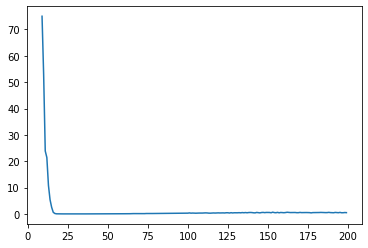

In [3]:
plt.plot(value_loss)

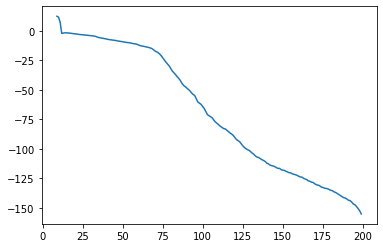

In [4]:
plt.plot(actor_loss)

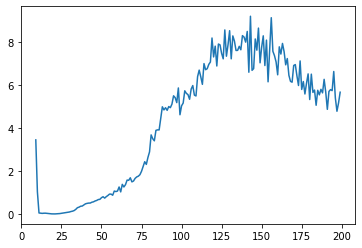

In [5]:
plt.plot(critic_loss)

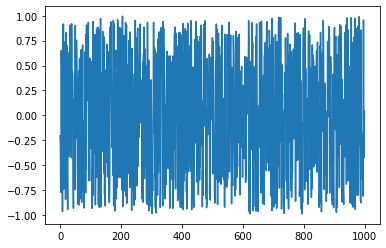

In [7]:
plt.plot(action_record[-1])

In [1]:
#save losses: final_loss, value_loss, actor_loss, critic_loss
import pybullet_envs
import gym
import numpy as np
from sac_torch import Agent, Agent_sm
import logging
import sys
import os
import matplotlib.pyplot as plt
import torch
log_format = '%(asctime)s %(message)s'
logging.basicConfig(stream=sys.stdout, level=logging.INFO,
    format=log_format, datefmt='%m/%d %I:%M:%S %p')
fh = logging.FileHandler(os.path.join('tmp', 'log.txt'))
fh.setFormatter(logging.Formatter(log_format))
logging.getLogger().addHandler(fh)
env = gym.make('InvertedPendulumBulletEnv-v0')
#print(env.action_space.shape[0])
agent = Agent_sm(input_dims=env.observation_space.shape[0], env=env, 
                n_actions=env.action_space.shape[0])
best_score = env.reward_range[0]
score_history = []
agent.load_models()
n_games_sm = 100
value_loss_sm = []
actor_loss_sm = []
critic_loss_sm = []
action_record_sm = []
for i in range(n_games_sm):
    observation = env.reset()
    done = False
    score = 0
    step = 0
    action_epi = []
    value_loss_epi = []
    actor_loss_epi = []
    critic_loss_epi = []
    while not done:
        action = agent.choose_action(observation)
        action_epi.append(action)
        observation_, reward, done, info = env.step(action)
        score += reward
        agent.remember(observation, action, reward, observation_, done)
        #if not load_checkpoints:
        l = agent.learn_sm()
                # append last loss of each episode
        if l is not None:
            actor_loss_epi.append(l[2].cpu().detach().numpy())
        observation = observation_
        # store mean losses of each episode
    actor_loss_sm.append(np.mean(actor_loss_epi))
    action_record_sm.append(action_epi)
    score_history.append(score)
    avg_score = np.mean(score_history[-100:])

#         if avg_score > best_score:
#             best_score = avg_score
#             #if not load_checkpoints:
#             agent.save_models()
    logging.info('episode %d score %.1f avg score %.1f', i, score, avg_score)

/home/siz075/.local/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


... loading models ...
03/01 06:09:23 PM episode 0 score 984.0 avg score 984.0
03/01 06:09:28 PM episode 1 score 469.0 avg score 726.5
03/01 06:09:32 PM episode 2 score 390.0 avg score 614.3
03/01 06:09:38 PM episode 3 score 485.0 avg score 582.0
03/01 06:09:45 PM episode 4 score 618.0 avg score 589.2
03/01 06:09:48 PM episode 5 score 290.0 avg score 539.3
03/01 06:09:58 PM episode 6 score 1000.0 avg score 605.1
03/01 06:10:09 PM episode 7 score 1000.0 avg score 654.5
03/01 06:10:12 PM episode 8 score 331.0 avg score 618.6
03/01 06:10:16 PM episode 9 score 320.0 avg score 588.7
03/01 06:10:25 PM episode 10 score 1000.0 avg score 626.1
03/01 06:10:35 PM episode 11 score 1000.0 avg score 657.2
03/01 06:10:42 PM episode 12 score 656.0 avg score 657.2
03/01 06:10:53 PM episode 13 score 1000.0 avg score 681.6
03/01 06:11:03 PM episode 14 score 1000.0 avg score 702.9
03/01 06:11:14 PM episode 15 score 1000.0 avg score 721.4
03/01 06:11:25 PM episode 16 score 1000.0 avg score 737.8
03/01 06:1

In [14]:
PATH = 'losses_sm_reg_1.pt'
torch.save({
        'actor_loss': actor_loss_sm,
        'actions': action_record_sm
        }, PATH)

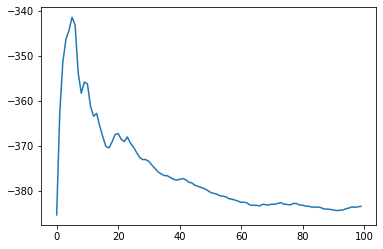

In [2]:
plt.plot(actor_loss_sm)

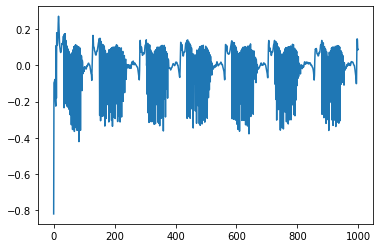

In [20]:
plt.plot(action_record_sm[-3])